# Revolut Debit Card Monthly Spending Analysis

## Importing Libraries

In [341]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import xgboost as xgb
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Exploratory Data Analysis (EDA)

In [343]:
df = pd.read_excel('revolut-spending-on-debit-cards-by-category-dataset.xlsx')
df.head(5)

,Date,Total,Automotive Fuel,Entertainment,Food and Drink,"Pubs, restaurants and fast food",Retail,Travel and accommodation
0,2020-01-01,97.16677,103.89,87.168390,93.94,90.14,105.08970,96.31484
1,2020-02-01,99.40897,99.19,100.104800,98.34,97.83,100.31590,100.28100
2,2020-03-01,75.47710,85.23,48.308390,111.16,60.48,85.07419,57.81000
3,2020-04-01,39.53067,43.00,6.634333,98.10,8.46,61.58867,6.99000
4,2020-05-01,48.48290,59.88,8.907097,102.20,13.48,79.36806,10.82387


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             48 non-null     datetime64[ns]
 1   Total                            48 non-null     float64       
 2   Automotive Fuel                  48 non-null     float64       
 3   Entertainment                    48 non-null     float64       
 4   Food and Drink                   48 non-null     float64       
 5   Pubs, restaurants and fast food  48 non-null     float64       
 6   Retail                           48 non-null     float64       
 7   Travel and accommodation         48 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 3.1 KB


/var/folders/st/vmqr0h8d6bq9l18bgf03n45w0000gn/T/ipykernel_95666/1571184108.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_spending = df.resample('M').mean()


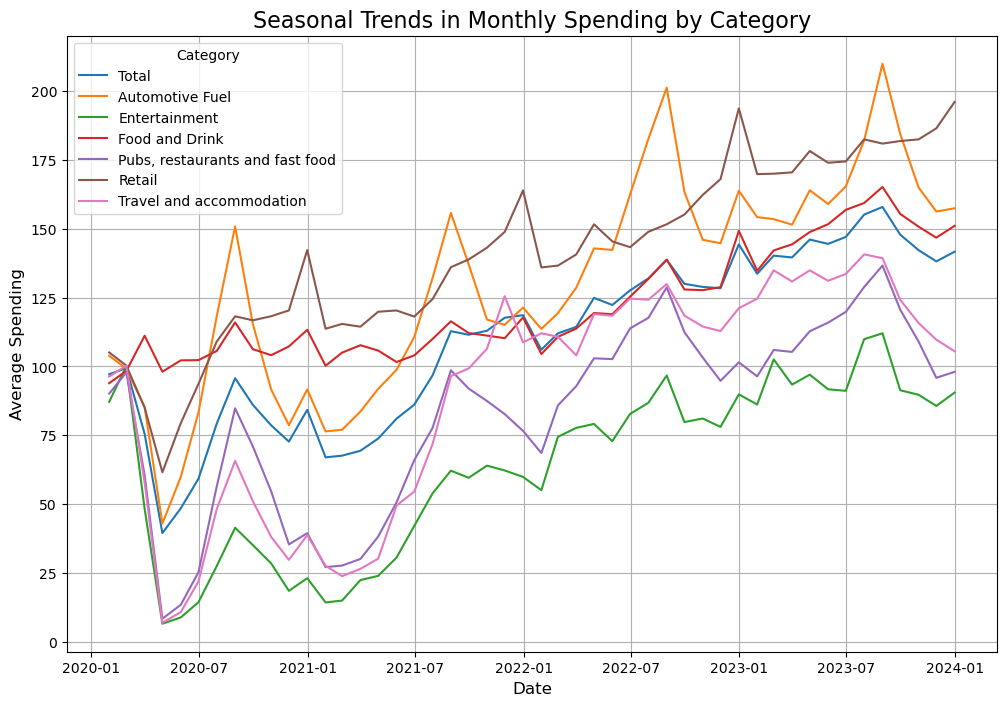

In [42]:
# Ensure the 'Month' column is a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Month' column as the index
df.set_index('Date', inplace=True)

# Resample data to calculate monthly averages (if not already done)
monthly_avg_spending = df.resample('M').mean()

# Plot seasonal trends for each spending category
plt.figure(figsize=(12, 8))
for column in monthly_avg_spending.columns:
    plt.plot(monthly_avg_spending.index, monthly_avg_spending[column], label=column)

plt.title('Seasonal Trends in Monthly Spending by Category', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Spending', fontsize=12)
plt.legend(title='Category', loc='upper left')
plt.grid(True)
plt.show()

## Forecasting Model

## ARIMA (Not used)

MAE: 5.453428861542565, RMSE: 7.44440680626054


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


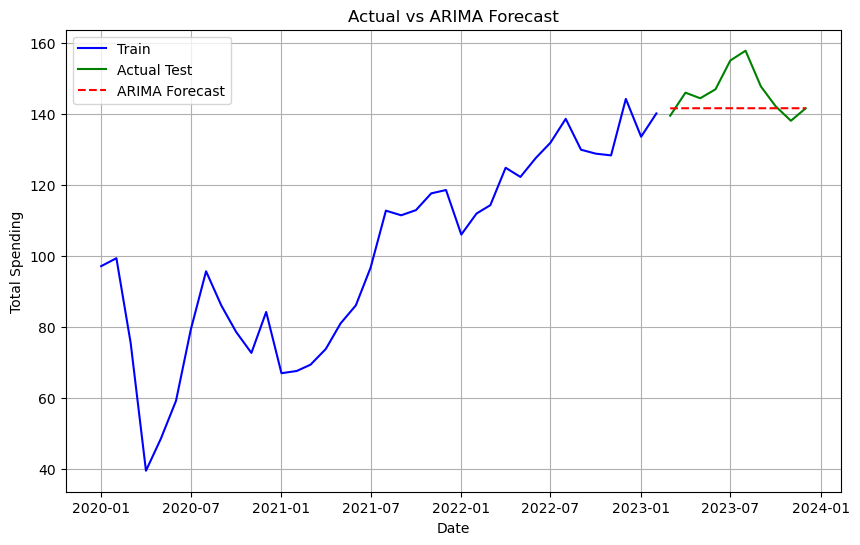

In [100]:
# Load the dataset
monthly_spending_cleaned = pd.read_excel('revolut-spending-on-debit-cards-by-category-dataset.xlsx')
monthly_spending_cleaned = monthly_spending_cleaned.rename(columns={'Date': 'Month'})

# Ensure the 'Month' column is a datetime object
monthly_spending_cleaned['Month'] = pd.to_datetime(monthly_spending_cleaned['Month'])

# Set the 'Month' column as the index
monthly_spending_cleaned.set_index('Month', inplace=True)

# Select the target variable (Total spending)
time_series = monthly_spending_cleaned['Total']

# Split the data chronologically (80% train, 20% test)
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Fit an ARIMA model
arima_model = ARIMA(train, order=(1, 1, 1))
arima_result = arima_model.fit()

# Forecast the test set
forecast = arima_result.forecast(steps=len(test))

# Evaluate the model
mae_arima = mean_absolute_error(test, forecast)
rmse_arima = np.sqrt(mean_squared_error(test, forecast))

print(f"MAE: {mae_arima}, RMSE: {rmse_arima}")

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Actual Test', color='green')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red', linestyle='--')
plt.title('Actual vs ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Total Spending')
plt.legend()
plt.grid(True)
plt.show()


## SARIMA

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA MAE with Exogenous Variables: 17.7919482132638, RMSE: 21.49749408144437


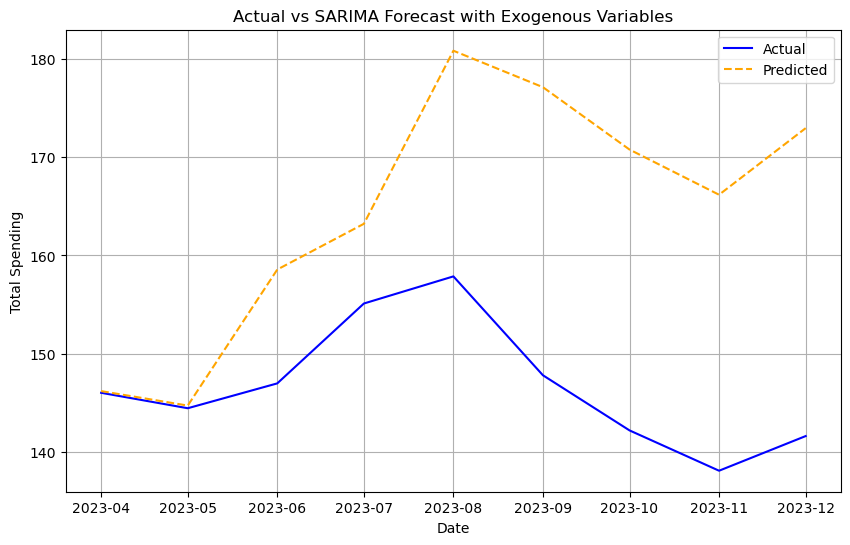

In [333]:
# Load the main dataset
monthly_spending_cleaned = pd.read_excel('revolut-spending-on-debit-cards-by-category-dataset.xlsx')
monthly_spending_cleaned = monthly_spending_cleaned.rename(columns={'Date': 'Month'})

# Ensure the 'Month' column is a datetime object
monthly_spending_cleaned['Month'] = pd.to_datetime(monthly_spending_cleaned['Month'])

# Set the 'Month' column as the index
monthly_spending_cleaned.set_index('Month', inplace=True)

# Load the PPI data
ppi_data = pd.read_excel('overall-output-ppi-inflation-rate-2020-2023.xlsx')  # Replace with your actual PPI data source
ppi_data['Month'] = pd.to_datetime(ppi_data['Month'])  # Ensure alignment
ppi_data.set_index('Month', inplace=True)

# Load the bank holiday data
bank_holiday_data = pd.read_csv('bank_holiday.csv')  # Load the bank holiday dataset
bank_holiday_data['Month'] = pd.to_datetime(bank_holiday_data['Month'])  # Ensure correct datetime format
bank_holiday_data.set_index('Month', inplace=True)

# Merge the PPI data with monthly spending data
merged_data = monthly_spending_cleaned.join(ppi_data, how='inner')

# Merge the Bank Holiday data with the previous result
merged_data = merged_data.join(bank_holiday_data, how='inner')

# Debugging: Check the merged data
# print("\nMerged Data")
# print(merged_data.head())

# Select the target variable (Total spending)
time_series = merged_data['Total']

# Feature engineering: Create lagged features for multiple columns
def create_lagged_features(data, columns, lags):
    df = data.copy()
    for column in columns:
        for lag in range(1, lags + 1):
            # Create lagged features for each specified column
            df[f'{column}_lag{lag}'] = df[column].shift(lag)
    return df

# Columns to apply lagging (features like 'Automotive Fuel', etc.)
columns_to_lag = ['Automotive Fuel', 'Entertainment', 'Food and Drink', 'Pubs, restaurants and fast food', 'Retail', 'Travel and accommodation']

# Apply lagged features
lags = 6  # Create lagged features for up to 6 months
time_series_lagged = create_lagged_features(merged_data, columns_to_lag, lags)

# Apply rolling averages (if needed)
def add_rolling_features(data, target_column, window_sizes):
    df = data.copy()
    for window in window_sizes:
        # Create rolling averages for the target column (e.g., 'Total')
        df[f'{target_column}_rolling{window}'] = df[target_column].rolling(window=window).mean()
    return df

# Define window sizes for rolling averages (3 and 6 months)
window_sizes = [3, 6]  # Rolling averages for 3 and 6 months
time_series_advanced = add_rolling_features(time_series_lagged, 'Total', window_sizes)

# Drop rows with NaN values introduced by lagging and rolling averages
time_series_advanced = time_series_advanced.dropna()

# Select exogenous variables: PPI, Bank_Holiday, lagged features, and rolling averages
exog_columns = ['ppi', 'Bank_Holiday'] + [f'{column}_lag{lag}' for column in columns_to_lag for lag in range(1, lags + 1)] + [f'Total_rolling{window}' for window in window_sizes]
exog = time_series_advanced[exog_columns]  # Select exogenous variables

# Align exog with the time_series index to avoid any misalignment
exog = exog.loc[time_series_advanced.index]

# Split the data chronologically (80% train, 20% test)
train_size = int(len(time_series_advanced) * 0.8)
train, test = time_series_advanced['Total'][:train_size], time_series_advanced['Total'][train_size:]
exog_train, exog_test = exog[:train_size], exog[train_size:]

# Filter train and exog_train to only include data starting from 2020-07-01
train = train[train.index >= '2020-07-01']
exog_train = exog_train.loc[train.index]

# Fit an SARIMA model with exogenous variables
sarima_model = SARIMAX(train, exog=exog_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)

# Forecast with exogenous variables
forecast = sarima_result.forecast(steps=len(test), exog=exog_test)

# Evaluate the model
mae_sarima = mean_absolute_error(test, forecast)
rmse_sarima = np.sqrt(mean_squared_error(test, forecast))

print(f"SARIMA MAE with Exogenous Variables: {mae_sarima}, RMSE: {rmse_sarima}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, forecast, label='Predicted', color='orange', linestyle='--')
plt.title('Actual vs SARIMA Forecast with Exogenous Variables')
plt.xlabel('Date')
plt.ylabel('Total Spending')
plt.legend()
plt.grid(True)
plt.show()

## XGBoost

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best MAE: 4.764451739501954, Best RMSE: 6.163681672711476


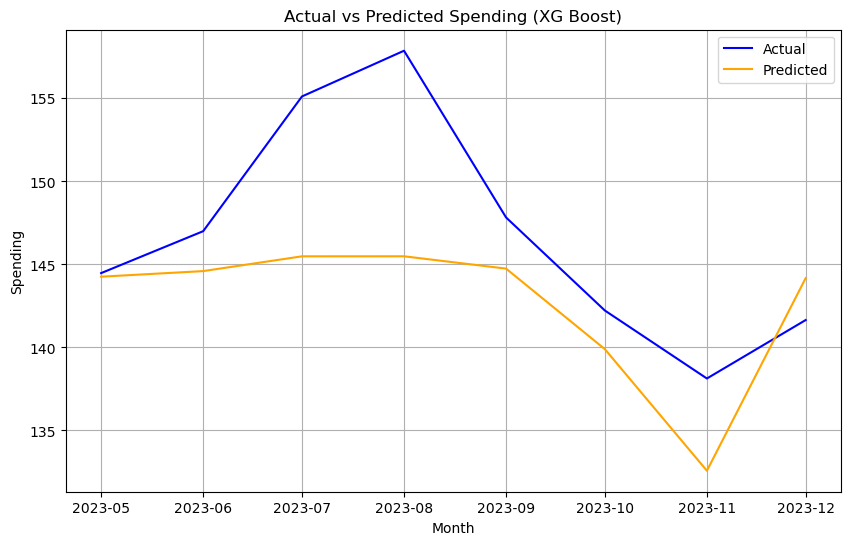

In [335]:
# Load the dataset
monthly_spending_cleaned = pd.read_excel('revolut-spending-on-debit-cards-by-category-dataset.xlsx')
monthly_spending_cleaned = monthly_spending_cleaned.rename(columns={'Date': 'Month'})

# Ensure the 'Month' column is a datetime object
monthly_spending_cleaned['Month'] = pd.to_datetime(monthly_spending_cleaned['Month'])

# Set the 'Month' column as the index
monthly_spending_cleaned.set_index('Month', inplace=True)

# Assuming you have PPI data in a similar format
ppi_data = pd.read_excel('overall-output-ppi-inflation-rate-2020-2023.xlsx')  # Replace with your actual PPI data source
ppi_data['Month'] = pd.to_datetime(ppi_data['Month'])  # Ensure alignment
ppi_data.set_index('Month', inplace=True)

# Load the bank holiday data
bank_holiday_data = pd.read_csv('bank_holiday.csv')  # Load the bank holiday dataset
bank_holiday_data['Month'] = pd.to_datetime(bank_holiday_data['Month'])  # Ensure correct datetime format
bank_holiday_data.set_index('Month', inplace=True)

# Merge the two datasets on 'Month'
merged_data = monthly_spending_cleaned.join(ppi_data, how='inner')  # Merge on the Month column

# Merge the Bank Holiday data with the previous result
merged_data = merged_data.join(bank_holiday_data, how='inner')

# Set the 'Month' column as the index
# monthly_spending_cleaned.set_index('Month', inplace=True)

# merged_data.set_index('Month', inplace=True)

# Feature engineering: Create lagged features for multiple columns
def create_lagged_features(data, columns, lags):
    df = data.copy()
    for column in columns:
        for lag in range(1, lags + 1):
            df[f'{column}_lag{lag}'] = df[column].shift(lag)
    return df

# Columns to apply lagging
columns_to_lag = ['Automotive Fuel', 'Entertainment', 'Food and Drink', 'Pubs, restaurants and fast food', 'Retail', 'Travel and accommodation']

# Apply lagged features
lags = 6  # Use up to the last 6 months as features
time_series_lagged = create_lagged_features(merged_data, columns_to_lag, lags)

# Drop rows with NaN values introduced by lagging
time_series_lagged = time_series_lagged.dropna()

# Apply rolling averages (if needed)
def add_rolling_features(data, target_column, window_sizes):
    df = data.copy()
    for window in window_sizes:
        df[f'{target_column}_rolling{window}'] = df[target_column].rolling(window=window).mean()
    return df

window_sizes = [3, 6]  # Rolling averages for 3 and 6 months
time_series_advanced = add_rolling_features(time_series_lagged, 'Total', window_sizes)

# Drop rows with NaN values introduced by rolling averages
time_series_advanced = time_series_advanced.dropna()

# Split into features and target
X_advanced = time_series_advanced.drop(columns=['Total'])
y_advanced = time_series_advanced['Total']

# Train-test split
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(
    X_advanced, y_advanced, test_size=0.2, random_state=42, shuffle=False
)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1
)

grid_search.fit(X_train_adv, y_train_adv)

# Best model from GridSearch
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred_best = best_model.predict(X_test_adv)
mae_best = mean_absolute_error(y_test_adv, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test_adv, y_pred_best))

print(f"Best MAE: {mae_best}, Best RMSE: {rmse_best}")

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(y_test_adv.index, y_test_adv, label="Actual", color="blue")
plt.plot(y_test_adv.index, y_pred_best, label="Predicted", color="orange")
plt.legend()
plt.title("Actual vs Predicted Spending (XG Boost)")
plt.xlabel("Month")
plt.ylabel("Spending")
plt.grid()
plt.show()


<Figure size 1000x600 with 0 Axes>

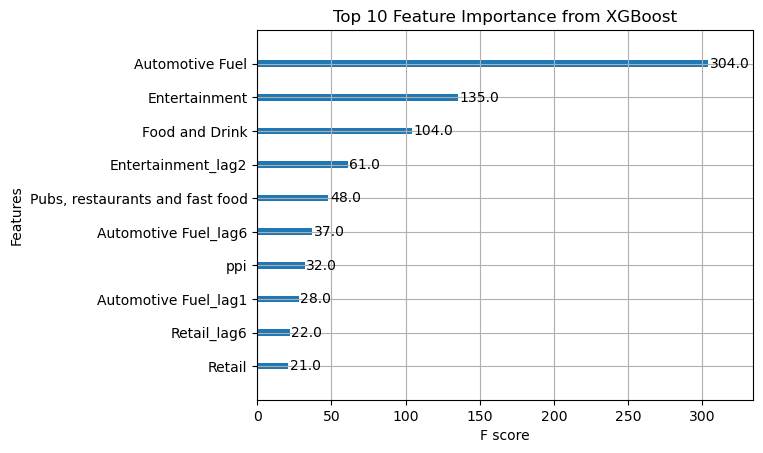

In [239]:
# Feature importance plot
plt.figure(figsize=(10, 6))
xgb.plot_importance(best_model, importance_type='weight', max_num_features=10)
plt.title("Top 10 Feature Importance from XGBoost")
plt.show()